In [1]:
### EDA
import pandas as pd
df = pd.read_csv('cleaned_bikes.csv')
df.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,15.433333,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0
1,9080521,3/31/2016 22:59,3/31/2016 23:02,3439,3.300000,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974.0


In [3]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['starttime'].dt.year.unique()

array([2016])

In [4]:
### Is there a relationship between the age and the tripduration?
df['age'] = 2016 - df['birthyear'] ## the missing values will be omitted while creating a scatter plot

<AxesSubplot:xlabel='age', ylabel='tripduration'>

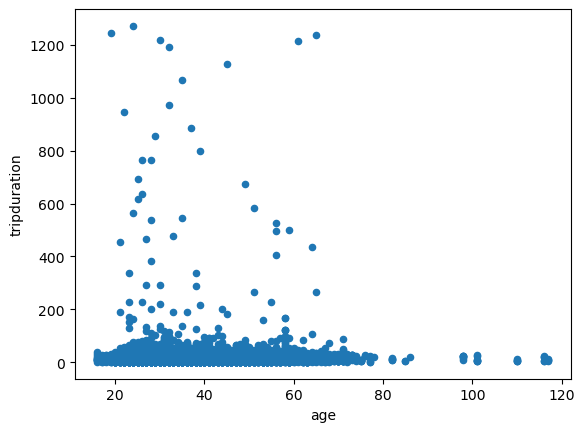

In [5]:
df.plot("age","tripduration",kind='scatter') ## there doesn't seem to be any relationship, we can verify further by computing correlation coeffs

In [6]:
df[['age','tripduration']].corr() ## very weak relationship, missing values are omitted while computing correlations

,age,tripduration
age,1.000000,0.003924
tripduration,0.003924,1.000000


In [12]:
## Is there any relationship between the user type and tripduration
df.groupby('usertype')['tripduration'].mean()

usertype
Customer      30.979781
Subscriber    12.067202
Name: tripduration, dtype: float64

In [13]:
df.usertype.value_counts() ##more trips by subscribers but the average duration is less

Subscriber    54982
Customer      17149
Name: usertype, dtype: int64

In [14]:
## Is there any relationship between the gender and and tripduration
df.groupby('gender')['tripduration'].mean()

gender
Female     13.404497
Male       11.620317
missing    30.972930
Name: tripduration, dtype: float64

In [15]:
df.gender.value_counts()

Male       41194
missing    17154
Female     13783
Name: gender, dtype: int64

In [16]:
### Is there any relationship between age and usertype
df.groupby('usertype')['age'].mean()

usertype
Customer      38.000000
Subscriber    35.576025
Name: age, dtype: float64